In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Open annotated propaganda tweets

In [2]:
with open('../../../data/tweets_vips_annotated.json') as f:
    propaganda_tweets = json.load(f)

Open file with political representatives handles

In [3]:
vips = pd.read_csv("../../../data/twitter_representatives_handles_final.csv")

Add info on author and party to annotated tweets

In [4]:
tweets = []
for tweet in propaganda_tweets:
    tweet_id = tweet
    created_at = propaganda_tweets[tweet]['created_at']
    author_id = propaganda_tweets[tweet]['author_id']
    Party = vips[vips['ids'] == author_id]['Party'].values[0]
    if "annotations" not in propaganda_tweets[tweet]:
        continue
    annotations = [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]
    tweets.append([tweet_id, created_at, author_id, Party, annotations])

df = pd.DataFrame(tweets, columns=['tweet_id', 'created_at', 'author_id', 'Party', 'annotations'])

,tweet_id,created_at,author_id,Party,annotations
0,1544421129795821570,2022-07-05,1047059160,Fratelli d'Italia,[Slogans]
1,1544410254343081990,2022-07-05,130537001,Fratelli d'Italia,"[Conversation_Killer, Questioning_the_Reputati..."
2,1544407020148858881,2022-07-05,61160450,Lega,[Slogans]
3,1544406008746987521,2022-07-05,2416067982,Azione - Italia Viva,"[Doubt, Doubt, Doubt]"
4,1544404370921558016,2022-07-05,2416067982,Azione - Italia Viva,"[Appeal_to_Values, Appeal_to_Values, Doubt, Do..."
...,...,...,...,...,...
11844,1574496046524293120,2022-09-26,964460408,Partito Democratico,[Doubt]
11845,1574498265046732800,2022-09-26,964460408,Partito Democratico,"[Appeal_to_Values, Appeal_to_Values]"
11846,1574498293140406290,2022-09-26,337767301,Lega,"[Appeal_to_Hypocrisy, Doubt, Doubt, Doubt, Doubt]"
11847,1574512794984030208,2022-09-26,214485357,Partito Democratico,[Doubt]


Define reference swing periods

In [5]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

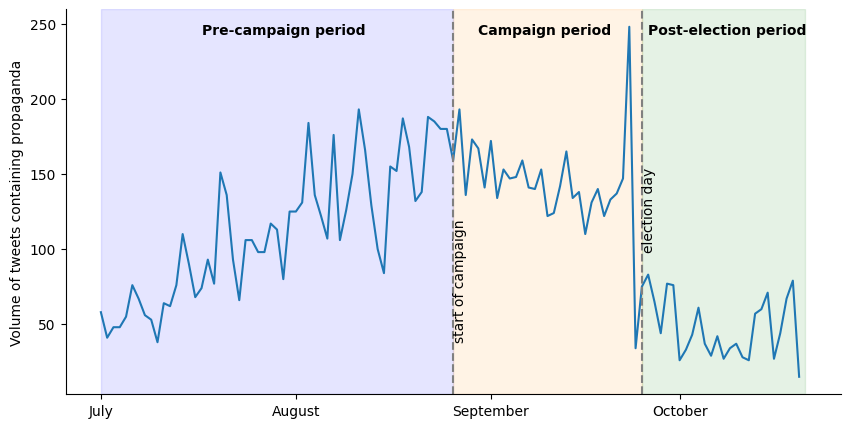

In [6]:
# define figure size
plt.figure(figsize=(10, 5))

# lineplot of number of tweets by day
sns.lineplot(data=df.groupby('created_at').size())
plt.axvline(start_during, color='grey', linestyle='--')
plt.axvline(start_after, color='grey', linestyle='--')

# annotate the plot
plt.text(start_during, 40, 'start of campaign', rotation=90)
plt.text(start_after, 100, 'election day', rotation=90)

plt.ylabel('Volume of tweets containing propaganda')
plt.xlabel('')

plt.xticks(ticks=['2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01'],
           labels=['July', 'August', 'September', 'October'])

# add annotation of "Pre-campaign period", "Campaign period", "Post-election period"
plt.axvspan(start_before, start_during, alpha=0.1, color='blue')
plt.axvspan(start_during, start_after, alpha=0.1, color='darkorange')
plt.axvspan(start_after, end_after, alpha=0.1, color='green')
 
plt.text('2022-07-17', 243, 'Pre-campaign period', rotation=0, color='black', fontsize=10, fontweight='bold')
plt.text('2022-08-30', 243, 'Campaign period', rotation=0, color='black', fontsize=10, fontweight='bold')
plt.text('2022-09-26', 243, 'Post-election period', rotation=0, color='black', fontsize=10, fontweight='bold')

sns.despine()

plt.show()



In [10]:
# create "period" column conditional on created_at
df['period'] = 'before'
df.loc[df['created_at'] >= start_during, 'period'] = 'during'
df.loc[df['created_at'] >= start_after, 'period'] = 'after'

In [11]:
df["unique_annotations"] = df["annotations"]

# Techniques by period

In [12]:
# subset dataframes for each period
before = df[df['period'] == 'before']
during = df[df['period'] == 'during']
after = df[df['period'] == 'after']

In [13]:
print(len(before), len(during), len(after))

6243 4343 1263


In [14]:
# count unique annotations for each period
before_annotations = before['unique_annotations'].explode().value_counts()
during_annotations = during['unique_annotations'].explode().value_counts()
after_annotations = after['unique_annotations'].explode().value_counts()

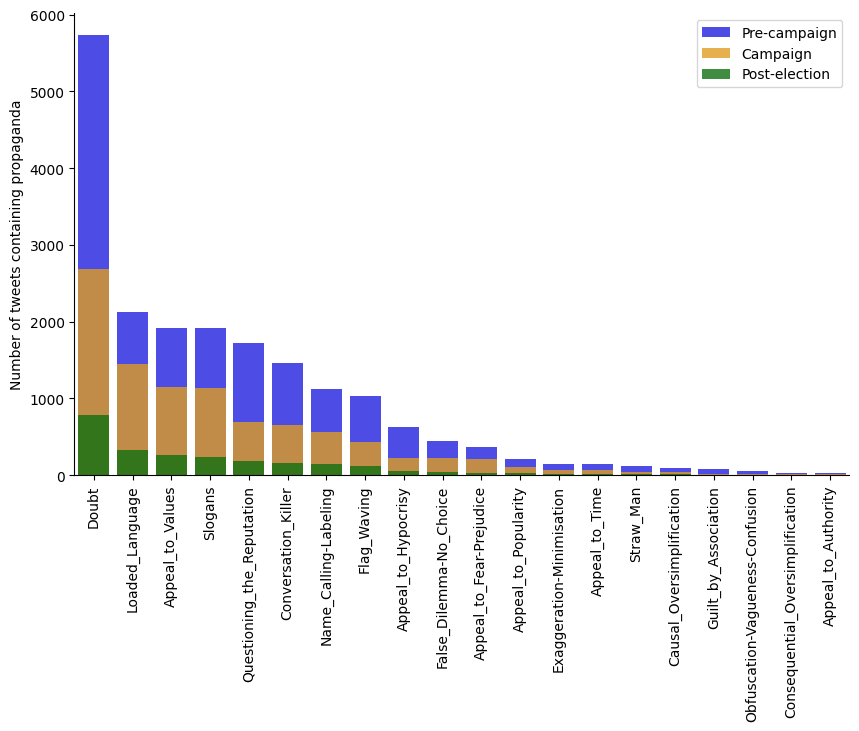

In [15]:
# plot annotations with dots
plt.figure(figsize=(10, 6))
# barplot
sns.barplot(x=before_annotations.index, y=before_annotations.values, color='blue', label='Pre-campaign', alpha=0.8)
sns.barplot(x=during_annotations.index, y=during_annotations.values, color='orange', label='Campaign', alpha=0.8)
sns.barplot(x=after_annotations.index, y=after_annotations.values, color='green', label='Post-election', alpha=0.8)

plt.ylabel('Number of tweets containing propaganda')

# legend and labels
plt.legend();
plt.xticks(rotation=90)

# despine
sns.despine()

# Technique by party

In [16]:
# compute baseline of % of tweets containing each annotation
total_tweets = len(df)
baseline = df['unique_annotations'].explode().value_counts() / total_tweets
baseline

Doubt                               0.776352
Loaded_Language                     0.303908
Slogans                             0.302979
Appeal_to_Values                    0.280783
Questioning_the_Reputation          0.215292
Conversation_Killer                 0.194278
Flag_Waving                         0.144147
Name_Calling-Labeling               0.143472
Appeal_to_Hypocrisy                 0.076378
False_Dilemma-No_Choice             0.059077
Appeal_to_Fear-Prejudice            0.052494
Appeal_to_Time                      0.029201
Straw_Man                           0.019242
Appeal_to_Popularity                0.018145
Exaggeration-Minimisation           0.016963
Causal_Oversimplification           0.011984
Repetition                          0.007596
Guilt_by_Association                0.006583
Appeal_to_Authority                 0.003545
Consequential_Oversimplification    0.003376
Obfuscation-Vagueness-Confusion     0.003291
Red_Herring                         0.002025
Whatabouti

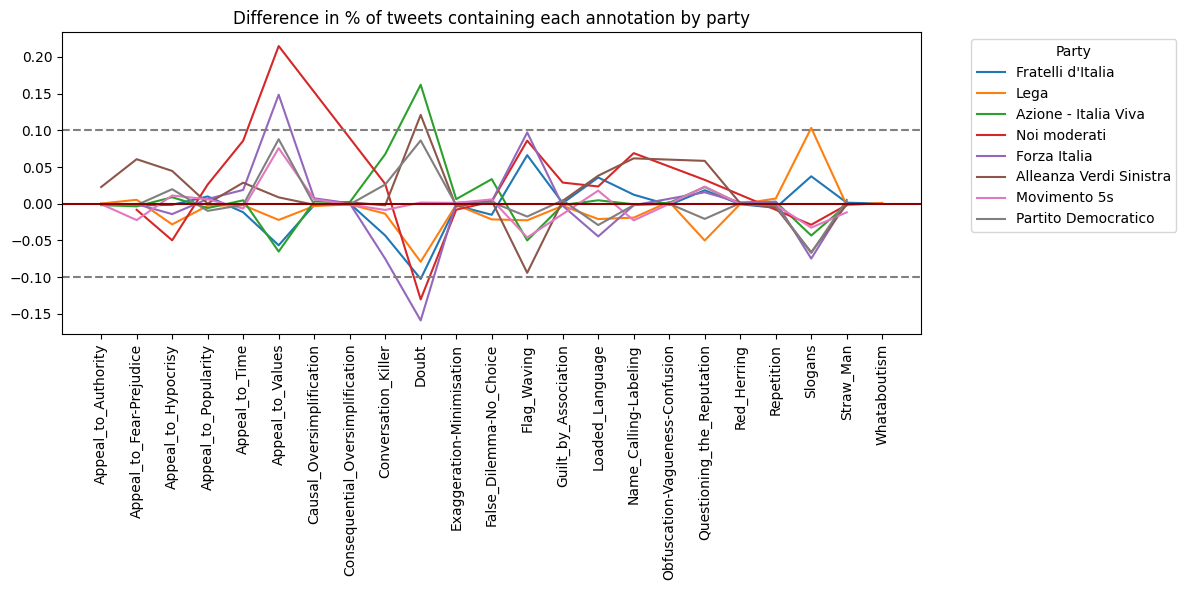

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize empty dictionaries to store data for each party
party_diffs = {}
party_annotations_percs = {}

# Iterate over unique parties
for party in df["Party"].unique():
    party_annotations = df[df["Party"] == party]["unique_annotations"].explode().value_counts()

    # Compute % of tweets containing each annotation by party
    party_annotations_perc = party_annotations / len(df[df["Party"] == party])

    # Store party annotations percentages
    party_annotations_percs[party] = party_annotations_perc

    # Compute the difference between party_annotations_perc and baseline
    party_diff = party_annotations_perc - baseline

    # Store party differences
    party_diffs[party] = party_diff

# Plot all parties with multiple lines and colors
plt.figure(figsize=(12, 6))

for party, diff in party_diffs.items():
    # Lineplot for each party
    sns.lineplot(x=diff.index, y=diff.values, label=party)

plt.title('Difference in % of tweets containing each annotation by party')
plt.xticks(rotation=90)
plt.axhline(0, color='darkred')  # Add line at 0
plt.axhline(0.1, color='grey', linestyle='--')  # Add dashed lines at 0.1 and -0.1
plt.axhline(-0.1, color='grey', linestyle='--')

plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


Fratelli d'Italia
Series([], Name: unique_annotations, dtype: float64)
Doubt   -0.102461
Name: unique_annotations, dtype: float64



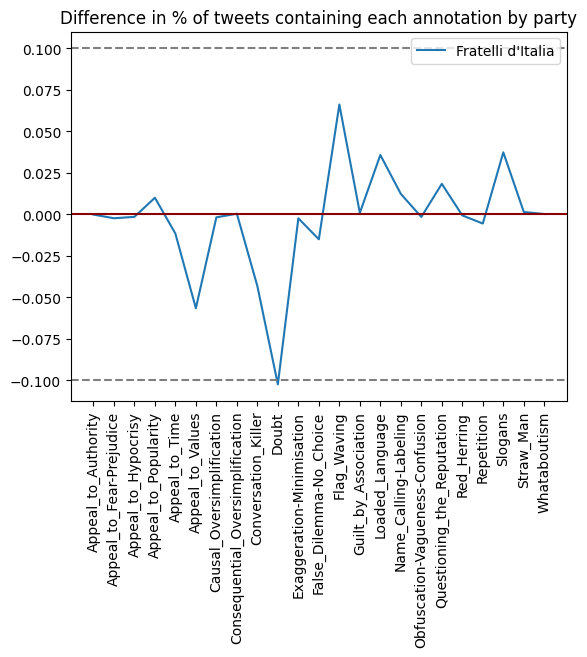

Lega
Slogans    0.10331
Name: unique_annotations, dtype: float64
Series([], Name: unique_annotations, dtype: float64)



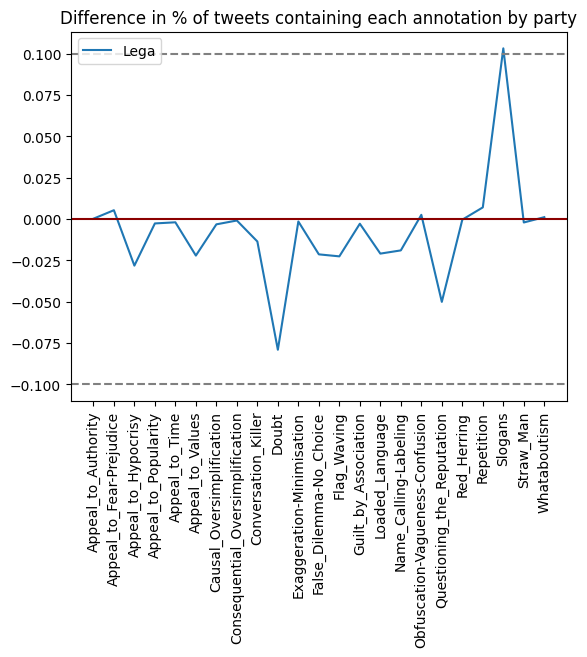

Azione - Italia Viva
Doubt    0.16209
Name: unique_annotations, dtype: float64
Series([], Name: unique_annotations, dtype: float64)



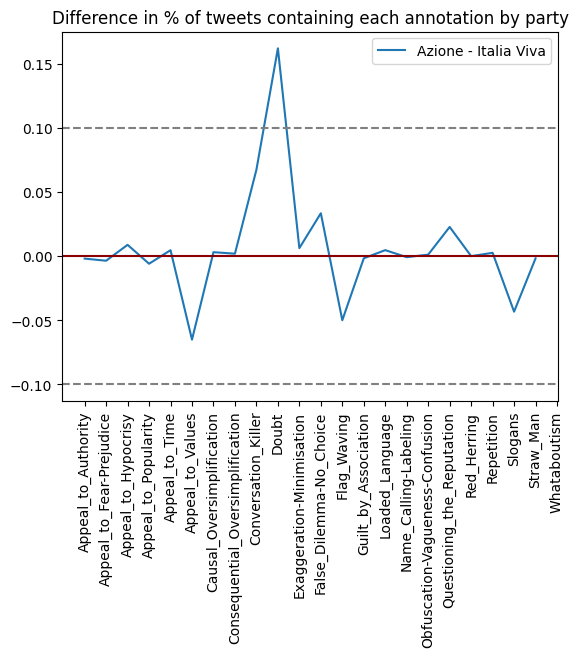

Noi moderati
Appeal_to_Values    0.214792
Name: unique_annotations, dtype: float64
Doubt   -0.130335
Name: unique_annotations, dtype: float64



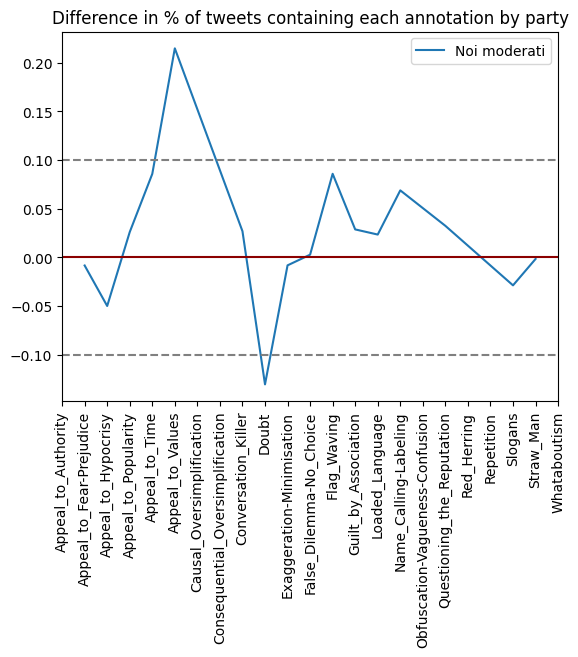

Forza Italia
Appeal_to_Values    0.148529
Name: unique_annotations, dtype: float64
Doubt   -0.158972
Name: unique_annotations, dtype: float64



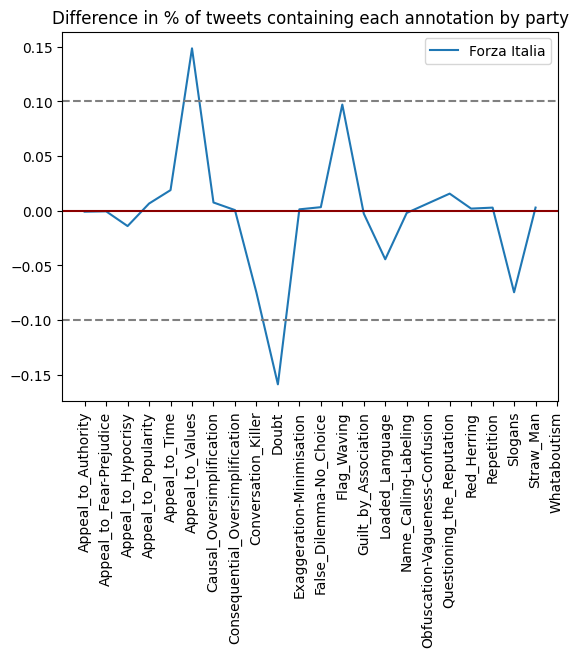

Alleanza Verdi Sinistra
Doubt    0.121016
Name: unique_annotations, dtype: float64
Series([], Name: unique_annotations, dtype: float64)



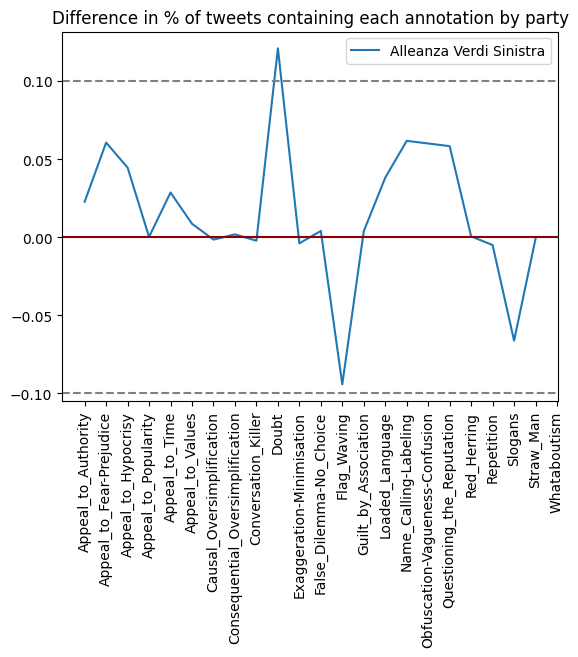

Movimento 5s
Series([], Name: unique_annotations, dtype: float64)
Series([], Name: unique_annotations, dtype: float64)



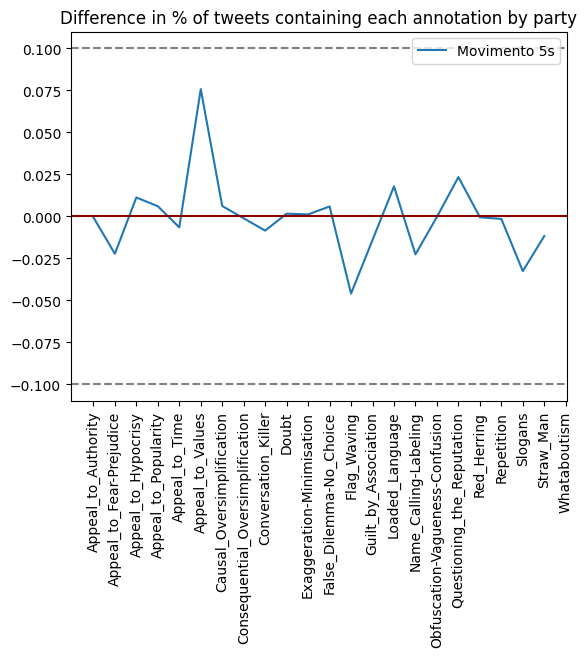

Partito Democratico
Series([], Name: unique_annotations, dtype: float64)
Series([], Name: unique_annotations, dtype: float64)



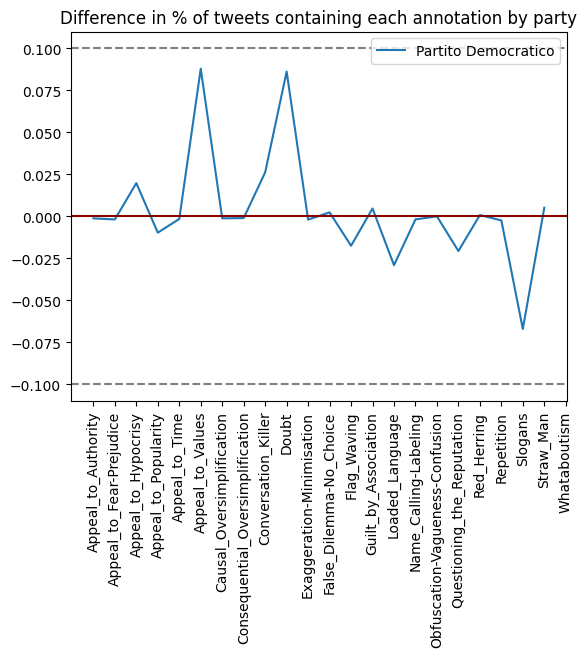

In [25]:
for party in df["Party"].unique():
    party_annotations = df[df["Party"] == party]["unique_annotations"].explode().value_counts()

    # compute % of tweets containing each annotation by party
    party_annotations_perc = party_annotations / len(df[df["Party"] == party])

    # for the index values in party_annotations_perc that are not in baseline, add them with value 0
    for index in party_annotations_perc.index:
        if index not in baseline:
            baseline[index] = 0
    
    # compute the difference between party_annotations_perc and baseline
    party_diff = party_annotations_perc - baseline

    # print when difference is very positive or very negative
    print(party)
    print(party_diff[party_diff > 0.1])
    print(party_diff[party_diff < -0.1])
    print()

    # plot difference in a meaningful way
    # # lineplot
    sns.lineplot(x=party_diff.index, y=party_diff.values, label=party)
    plt.title('Difference in % of tweets containing each annotation by party')
    plt.xticks(rotation=90)

    # add line at 0
    plt.axhline(0, color='darkred')
    # add dashed lines at 0.1 and -0.1
    plt.axhline(0.1, color='grey', linestyle='--')
    plt.axhline(-0.1, color='grey', linestyle='--')

    plt.show()


    # # barplot
    # sns.barplot(x=party_annotations.index, y=party_annotations.values, color="grey", alpha=0.8, label=party)
    # plt.title('Unique annotations for party '+party)
    # plt.xticks(rotation=90)
    # plt.show()



# Techniques by party and period

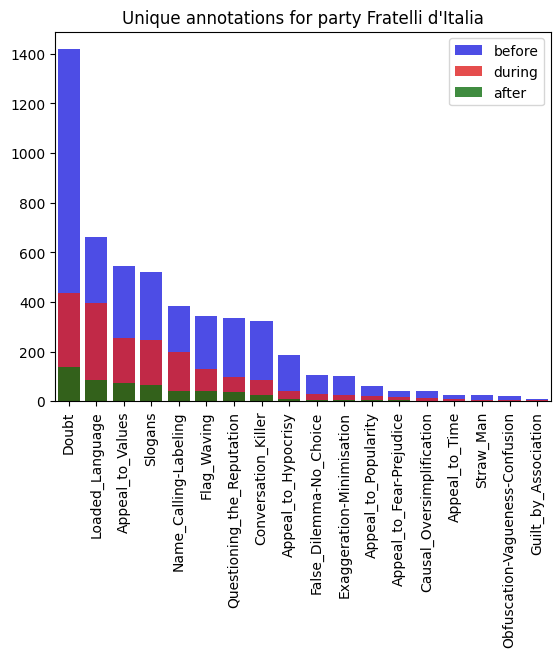

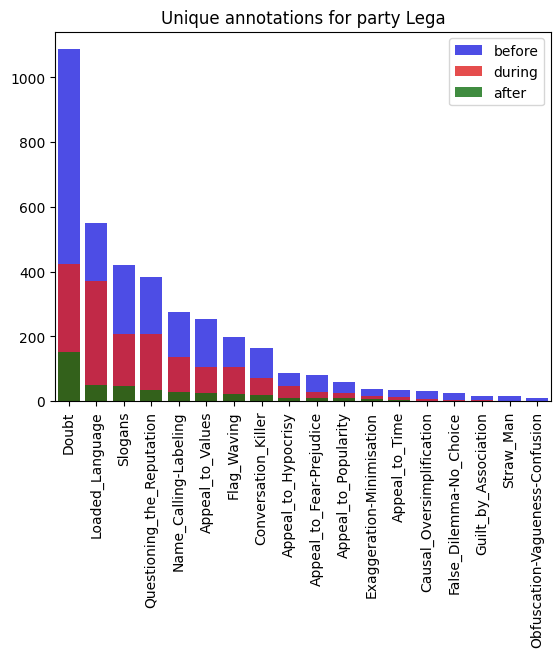

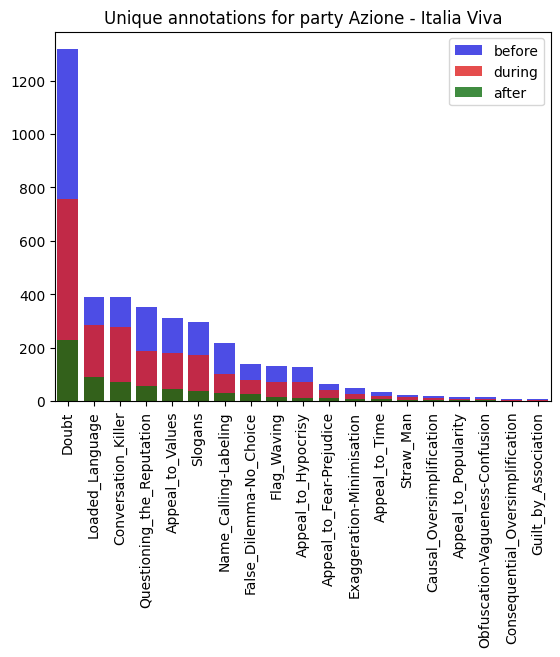

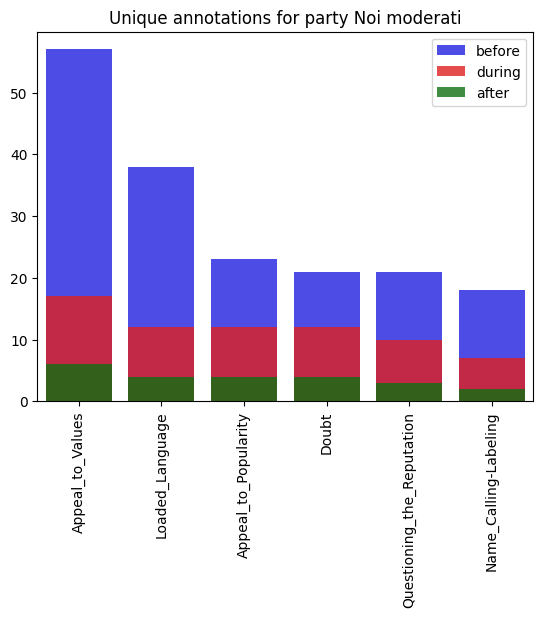

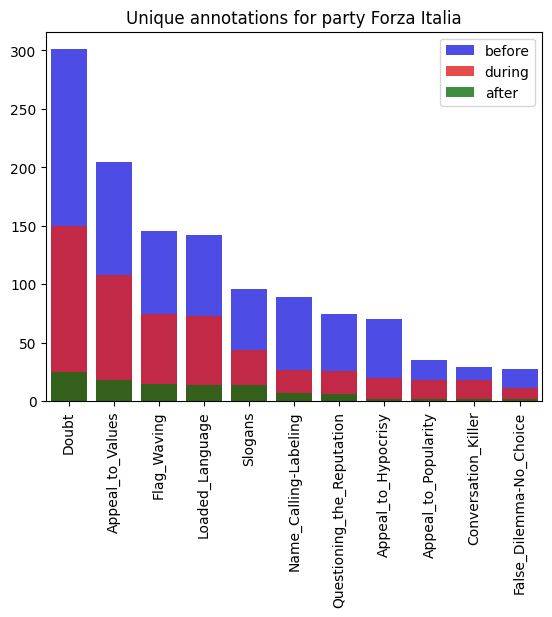

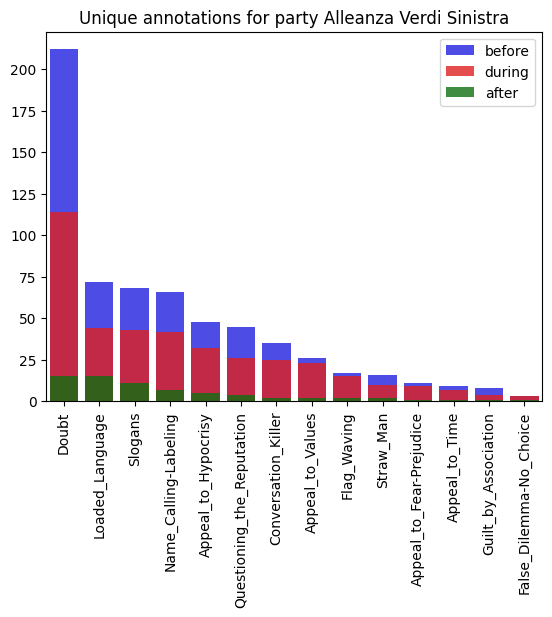

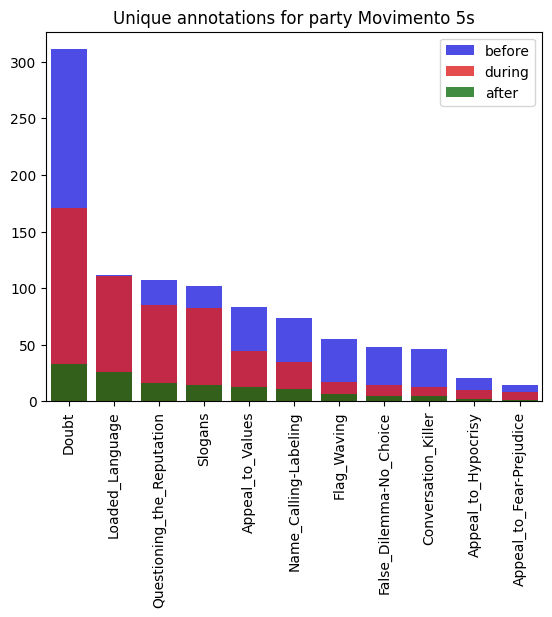

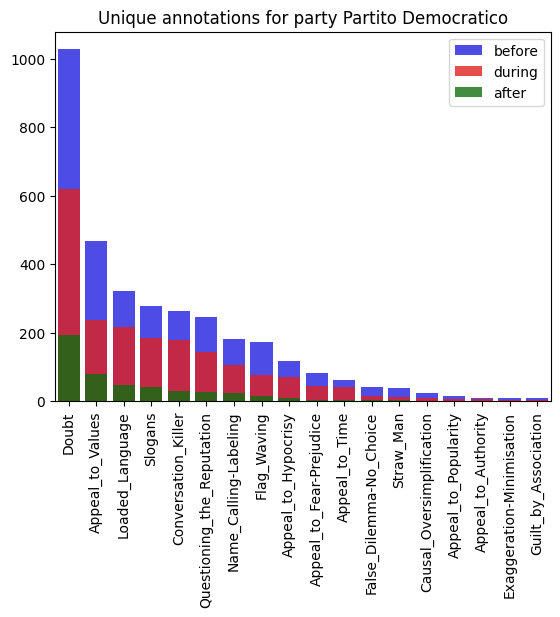

In [17]:
for party in df["Party"].unique():
    # before
    party_annotations_before = before[before["Party"] == party]["unique_annotations"].explode().value_counts()
    # during
    party_annotations_during = during[during["Party"] == party]["unique_annotations"].explode().value_counts()
    # after
    party_annotations_after = after[after["Party"] == party]["unique_annotations"].explode().value_counts()


    # barplots
    sns.barplot(x=party_annotations_before.index, y=party_annotations_before.values, color='blue', label='before', alpha=0.8)
    sns.barplot(x=party_annotations_during.index, y=party_annotations_during.values, color='red', label='during', alpha=0.8)
    sns.barplot(x=party_annotations_after.index, y=party_annotations_after.values, color='green', label='after', alpha=0.8)

    plt.title('Unique annotations for party '+party)
    plt.legend();
    plt.xticks(rotation=90)
    plt.show()